# Hypotheses testing and fair coins

## Distribution for a fair coin

[9.5367431640625e-07, 1.9073486328125e-05, 0.0001811981201171875, 0.001087188720703125, 0.004620552062988281, 0.0147857666015625, 0.03696441650390625, 0.0739288330078125, 0.12013435363769531, 0.16017913818359375, 0.17619705200195312, 0.16017913818359375, 0.12013435363769531, 0.0739288330078125, 0.03696441650390625, 0.0147857666015625, 0.004620552062988281, 0.001087188720703125, 0.0001811981201171875, 1.9073486328125e-05, 9.5367431640625e-07]


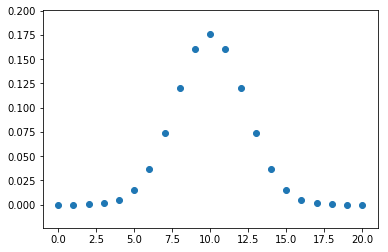

In [6]:
import numpy as np
from math import factorial

n = 20
def choose(n,k):
    return factorial(n)/factorial(n-k)/factorial(k)
    
x_values = [ i for i in range(n+1)]   # We want to go to n
y_values = [ choose(n,k)/2**n for k in x_values]
print(y_values)

import matplotlib.pyplot as plt
plt.scatter(x_values, y_values)
plt.show()

## Computing a p-value from the distribution

In [16]:
expected_heads = n//2
bound = 2
print("lower bound is ", expected_heads-bound)
print("upper bound is ", expected_heads+bound)

in_range_probability = 0.0
for probability in y_values[expected_heads-bound: expected_heads+bound+1] :
    in_range_probability += probability
    
lower_tail_probability = 0.0
for probability in y_values[:expected_heads-bound] :
    lower_tail_probability += probability
    
upper_tail_probability = 0.0
for probability in y_values[expected_heads+bound+1:] :
    upper_tail_probability += probability

total_probability = 0.0
for probability in y_values:
    total_probability += probability

print("Probability inside of range is:", in_range_probability)
print("Probability lower tail is:", lower_tail_probability)
print("Probability upper tail is:", upper_tail_probability)
print("Probability outside of range (p-value) is:", lower_tail_probability + upper_tail_probability)
print("Sum is:", in_range_probability + lower_tail_probability + upper_tail_probability)

# The sum should be 1.0


lower bound is  8
upper bound is  12
Probability inside of range is: 0.7368240356445312
Probability lower tail is: 0.13158798217773438
Probability upper tail is: 0.13158798217773438
Probability outside of range (p-value) is: 0.26317596435546875
Sum is: 1.0


## A skew distribution
Lets look at a distribution for an unfair coin that has the given probability for coming up heads

[3.207202185381504e-13, 1.0690673951271679e-11, 1.763961201959827e-10, 1.920757753245145e-09, 1.5526125172064923e-08, 9.936720110121551e-08, 5.244380058119708e-07, 2.347484406967869e-06, 9.096502077000493e-06, 3.0995488558668345e-05, 9.401964862796064e-05, 0.0002564172235308018, 0.000633920358173371, 0.0014303843979296576, 0.0029629391099971476, 0.005662505854661217, 0.010027354117629238, 0.016515642076095214, 0.025385153561405607, 0.036518992842723856, 0.049300640337677205, 0.06260398773038375, 0.07493507622273206, 0.08470921659961016, 0.0905918010856942, 0.09179969176683679, 0.08826893439118921, 0.08064075487590126, 0.07008065602310466, 0.05799778429498318, 0.045753807610486724, 0.03443834981434485, 0.02475256392906036, 0.017001761082586914, 0.011167823456209052, 0.007019774743902832, 0.004224864429200777, 0.0024359578690887366, 0.001346187243443776, 0.0007133641802864451, 0.0003626267916456097, 0.00017689111787590718, 8.2829967894274e-05, 3.724138091370459e-05, 1.6081505394554254e-0

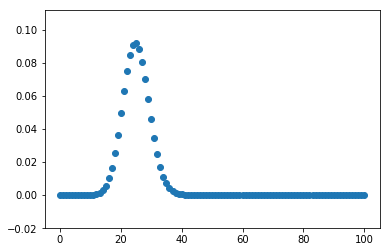

In [32]:
import numpy as np
from math import factorial

n = 100
p_head = .25

p_tail = 1-p_head
def choose(n,k):
    return factorial(n)/factorial(n-k)/factorial(k)
    
x_skew = [ i for i in range(n+1)]   # We want to go to n
y_skew = [ choose(n,k) * p_head**(k) * p_tail**(n-k) for k in x_values]
print(y_skew)

import matplotlib.pyplot as plt
plt.scatter(x_skew, y_skew)
plt.show()

## And we find p-values for the range of the skewed distribution

In [33]:
expected_heads = int(p_head * n)
bound = 8
print("lower bound is ", expected_heads-bound)
print("upper bound is ", expected_heads+bound)

in_range_probability = 0.0
for probability in y_skew[expected_heads-bound: expected_heads+bound+1] :
    in_range_probability += probability
    
lower_tail_probability = 0.0
for probability in y_skew[:expected_heads-bound] :
    lower_tail_probability += probability
    
upper_tail_probability = 0.0
for probability in y_skew[expected_heads+bound+1:] :
    upper_tail_probability += probability

total_probability = 0.0
for probability in y_skew:
    total_probability += probability

print("Probability inside of range is:", in_range_probability)
print("Probability lower tail is:", lower_tail_probability)
print("Probability upper tail is:", upper_tail_probability)
print("Probability outside of range (p-value) is:", lower_tail_probability + upper_tail_probability)
print("Sum is:", in_range_probability + lower_tail_probability + upper_tail_probability)
print(total_probability)
# The sum should be 1.0

lower bound is  17
upper bound is  33
Probability inside of range is: 0.9512948142448159
Probability lower tail is: 0.021110621625089383
Probability upper tail is: 0.027594564130094614
Probability outside of range (p-value) is: 0.048705185755184
Sum is: 0.9999999999999999
1.0


## Lets look at the overlap of a fair coin with an unfair coin.

[7.006492321624085e-46, 1.0509738482436128e-43, 7.829755169414915e-42, 3.862679216911358e-40, 1.4195346122149242e-38, 4.1450410676675785e-37, 1.0017182580196648e-35, 2.060677559354739e-34, 3.683461137346596e-33, 5.811683127813518e-32, 8.19447321021706e-31, 1.0429329540276259e-29, 1.208064005082e-28, 1.2824064053947384e-27, 1.2549262681362798e-26, 1.1377998164435604e-25, 9.60018595124254e-25, 7.567205396861767e-24, 5.591323987681195e-23, 3.8844987703890405e-22, 2.5443466946048216e-21, 1.5750717633267945e-20, 9.235648066779839e-20, 5.139838924120953e-19, 2.7198314306806714e-18, 1.3707950410630584e-17, 6.590360774341627e-17, 3.026684207475414e-16, 1.329579133998128e-15, 5.593401874061091e-15, 2.2560054225379732e-14, 8.732924216276026e-14, 3.247556192927647e-13, 1.1612473659559465e-12, 3.996057112260169e-12, 1.3244075000633704e-11, 4.230746180757988e-11, 1.303527201638948e-10, 3.876278257505292e-10, 1.113187602155366e-09, 3.0890955959811408e-09, 8.287817452632329e-09, 2.1508859579450566e-0

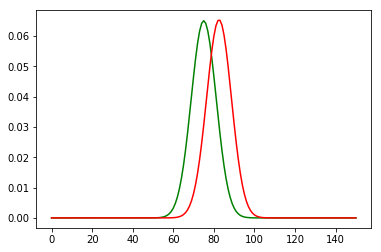

In [46]:
import numpy as np
from math import factorial


n = 150
p_head = 0.55

def choose(n,k):
    return factorial(n)/factorial(n-k)/factorial(k)

# Compute the probabilities for the fair coin
    
x_values = [ i for i in range(n+1)]   # We want to go to n
y_values = [ choose(n,k)/2**n for k in x_values]
print(y_values)

import matplotlib.pyplot as plt
plt.plot(x_values, y_values, color="green")


# Compute the probabilities for the unfair coin
p_tail = 1-p_head
def choose(n,k):
    return factorial(n)/factorial(n-k)/factorial(k)
    
x_skew = [ i for i in range(n+1)]   # We want to go to n
y_skew = [ choose(n,k) * p_head**(k) * p_tail**(n-k) for k in x_values]


plt.plot(x_skew, y_skew, color="red")
plt.show()